**Learning Embedded Stochastic Approximation**

Instance: LandS2, LandS3

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import copy 
import random
import time
# import the Model class from docplex.mp
from docplex.mp.model import Model

In [2]:
import utils
import sa_landS2_3

**Function Value Approxiamtion**

**LandS2**

In [3]:
# load landS2 file 
landS2_data = pd.read_csv('/Users/sonny/Documents/Courses/CSCI566/experiment/training_set/landS2_sample4.csv')
# split the data file 
landS2_train, landS2_val = train_test_split(landS2_data, test_size=0.2)

In [4]:
# pad zeros 
# 5 channels for x and 5 channels for omega 
n_x = 5
n_omega = 5

# landS2

landS2_train_pad_zero = np.zeros((landS2_train.shape[0],n_x+n_omega+1))
landS2_val_pad_zero = np.zeros((landS2_val.shape[0],n_x+n_omega+1))

landS2_train_pad_zero[:,:4] = landS2_train.to_numpy()[:,:4]
landS2_train_pad_zero[:,n_x : (n_x + 3)] = landS2_train.to_numpy()[:,4:7]
landS2_train_pad_zero[:,-1] = landS2_train.to_numpy()[:,-1]

landS2_val_pad_zero[:,:4] = landS2_val.to_numpy()[:,:4]
landS2_val_pad_zero[:,n_x : (n_x + 3)] = landS2_val.to_numpy()[:,4:7]
landS2_val_pad_zero[:,-1] = landS2_val.to_numpy()[:,-1]

In [5]:
# set up data loader 
batch_size = 40
nworkers = 4

landS2_train_data_loader = torch.utils.data.DataLoader(landS2_train_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)
landS2_val_data_loader = torch.utils.data.DataLoader(landS2_val_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)

In [3]:
import torch.nn as nn

# Neural Network Architecture 1 
# Linear, output units: 40
# ReLU 
# Linear, output units: 1

class nn_m1(nn.Module):
    def __init__(self, nz):
        super(nn_m1, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

# Neural Network Architecture 2
# Linear, output units: 40
# ReLU 
# Linear, output units: 80
# ReLU 
# Linear, output units: 40
# ReLU
# Linear, output units: 1
class nn_m2(nn.Module):
    def __init__(self, nz):
        super(nn_m2, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 80, bias=True),
            nn.ReLU(),
            nn.Linear(80, 40, bias=True),
            nn.ReLU(),
            nn.Linear(40, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)
    

# Neural Network Architecture 3
# Linear, output units: 128
# LeakyReLU 
# Linear, output units: 256
# LeakyReLU 
# Linear, output units: 128
# LeakyReLU
# Linear, output units: 1
class nn_m3(nn.Module):
    def __init__(self, nz):
        super(nn_m3, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(nz, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 256, bias=True),
            nn.LeakyReLU(),
            nn.Linear(256, 128, bias=True),
            nn.LeakyReLU(),
            nn.Linear(128, 1, bias=True))
    
    def forward(self, x):
        return self.net(x)

In [7]:
# build model 
nz = n_x + n_omega
landS2_model = nn_m3(nz)

# inirialize model hyperparameters 
model_parameter = {}
model_parameter['epoch'] = 30
model_parameter['learning_rate'] = 1e-4
model_parameter['output_model'] = '/Users/sonny/Documents/Courses/CSCI566/experiment2/landS2_model.pt'

Run Epoch 0
It 0, L2 training loss: 24800.373046875 
It 0, L2 validation loss: 24079.61328125 
It 50, L2 training loss: 17386.896484375 
It 50, L2 validation loss: 23296.26953125 
It 100, L2 training loss: 20544.296875 
It 100, L2 validation loss: 20432.376953125 
It 150, L2 training loss: 16038.361328125 
It 150, L2 validation loss: 13452.173828125 
Run Epoch 1
It 200, L2 training loss: 6445.0234375 
It 200, L2 validation loss: 6042.25390625 
It 250, L2 training loss: 5179.4345703125 
It 250, L2 validation loss: 4624.02294921875 
It 300, L2 training loss: 3907.231689453125 
It 300, L2 validation loss: 4292.1591796875 
It 350, L2 training loss: 4042.626220703125 
It 350, L2 validation loss: 3980.739990234375 
Run Epoch 2
It 400, L2 training loss: 4513.69140625 
It 400, L2 validation loss: 3675.12158203125 
It 450, L2 training loss: 3603.29638671875 
It 450, L2 validation loss: 3349.43359375 
It 500, L2 training loss: 2626.327392578125 
It 500, L2 validation loss: 3026.0341796875 
It 55

It 4250, L2 training loss: 6.234344482421875 
It 4250, L2 validation loss: 7.689115047454834 
It 4300, L2 training loss: 5.988550662994385 
It 4300, L2 validation loss: 7.421422481536865 
It 4350, L2 training loss: 10.73076057434082 
It 4350, L2 validation loss: 6.969582557678223 
Run Epoch 22
It 4400, L2 training loss: 5.2942705154418945 
It 4400, L2 validation loss: 6.84963846206665 
It 4450, L2 training loss: 5.05517053604126 
It 4450, L2 validation loss: 6.863129615783691 
It 4500, L2 training loss: 3.930964708328247 
It 4500, L2 validation loss: 6.493152141571045 
It 4550, L2 training loss: 3.619302272796631 
It 4550, L2 validation loss: 6.4367804527282715 
Run Epoch 23
It 4600, L2 training loss: 4.64947509765625 
It 4600, L2 validation loss: 6.414966583251953 
It 4650, L2 training loss: 6.666721343994141 
It 4650, L2 validation loss: 6.039602279663086 
It 4700, L2 training loss: 5.423740386962891 
It 4700, L2 validation loss: 5.859099864959717 
It 4750, L2 training loss: 2.805800

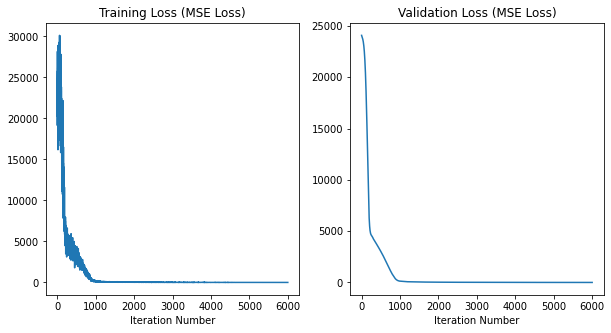

Model has been saved.


In [9]:
# train the model 
utils.normal_train(model_parameter, landS2_model, landS2_train_data_loader, landS2_val_pad_zero)

**LandS3**

In [10]:
# load landS3 file 
landS3_data = pd.read_csv('/Users/sonny/Documents/Courses/CSCI566/experiment/training_set/landS3_sample4.csv')
# split the data file 
landS3_train, landS3_val = train_test_split(landS3_data, test_size=0.2)

In [11]:
# pad zeros 
# 5 channels for x and 5 channels for omega 
n_x = 5
n_omega = 5

# landS3

landS3_train_pad_zero = np.zeros((landS3_train.shape[0],n_x+n_omega+1))
landS3_val_pad_zero = np.zeros((landS3_val.shape[0],n_x+n_omega+1))

landS3_train_pad_zero[:,:4] = landS3_train.to_numpy()[:,:4]
landS3_train_pad_zero[:,n_x : (n_x + 3)] = landS3_train.to_numpy()[:,4:7]
landS3_train_pad_zero[:,-1] = landS3_train.to_numpy()[:,-1]

landS3_val_pad_zero[:,:4] = landS3_val.to_numpy()[:,:4]
landS3_val_pad_zero[:,n_x : (n_x + 3)] = landS3_val.to_numpy()[:,4:7]
landS3_val_pad_zero[:,-1] = landS3_val.to_numpy()[:,-1]

In [14]:
# set up data loader 
batch_size = 40
nworkers = 4

landS3_train_data_loader = torch.utils.data.DataLoader(landS3_train_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)
landS3_val_data_loader = torch.utils.data.DataLoader(landS3_val_pad_zero, batch_size=batch_size, shuffle=True, num_workers=nworkers)

In [12]:
# build model 
nz = n_x + n_omega
landS3_model = nn_m3(nz)

# inirialize model hyperparameters 
model_parameter = {}
model_parameter['epoch'] = 30
model_parameter['learning_rate'] = 1e-4
model_parameter['output_model'] = '/Users/sonny/Documents/Courses/CSCI566/experiment2/landS3_model.pt'

Run Epoch 0
It 0, L2 training loss: 21590.38671875 
It 0, L2 validation loss: 21321.244140625 
It 50, L2 training loss: 26755.927734375 
It 50, L2 validation loss: 20358.2734375 
It 100, L2 training loss: 14809.986328125 
It 100, L2 validation loss: 17223.5234375 
It 150, L2 training loss: 10566.9892578125 
It 150, L2 validation loss: 9974.1005859375 
Run Epoch 1
It 200, L2 training loss: 4521.5146484375 
It 200, L2 validation loss: 3460.79638671875 
It 250, L2 training loss: 1918.997802734375 
It 250, L2 validation loss: 2510.031982421875 
It 300, L2 training loss: 2023.672607421875 
It 300, L2 validation loss: 2407.6796875 
It 350, L2 training loss: 2236.7939453125 
It 350, L2 validation loss: 2309.68115234375 
Run Epoch 2
It 400, L2 training loss: 1510.8134765625 
It 400, L2 validation loss: 2214.287109375 
It 450, L2 training loss: 2220.188232421875 
It 450, L2 validation loss: 2116.002197265625 
It 500, L2 training loss: 1745.1578369140625 
It 500, L2 validation loss: 2013.3404541

It 4250, L2 training loss: 4.0413713455200195 
It 4250, L2 validation loss: 7.922896385192871 
It 4300, L2 training loss: 6.54149866104126 
It 4300, L2 validation loss: 7.7604570388793945 
It 4350, L2 training loss: 10.447141647338867 
It 4350, L2 validation loss: 7.516556262969971 
Run Epoch 22
It 4400, L2 training loss: 4.513700485229492 
It 4400, L2 validation loss: 7.343395233154297 
It 4450, L2 training loss: 6.466536045074463 
It 4450, L2 validation loss: 7.298495292663574 
It 4500, L2 training loss: 11.12710952758789 
It 4500, L2 validation loss: 7.0474348068237305 
It 4550, L2 training loss: 15.990567207336426 
It 4550, L2 validation loss: 7.2923784255981445 
Run Epoch 23
It 4600, L2 training loss: 9.502227783203125 
It 4600, L2 validation loss: 6.842846393585205 
It 4650, L2 training loss: 5.177720069885254 
It 4650, L2 validation loss: 6.692695617675781 
It 4700, L2 training loss: 8.302080154418945 
It 4700, L2 validation loss: 6.776916980743408 
It 4750, L2 training loss: 2.

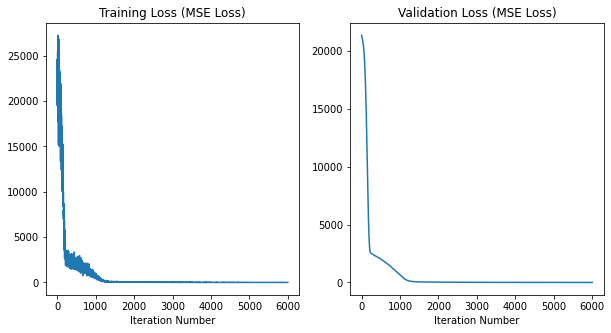

Model has been saved.


In [15]:
# train the model 
utils.normal_train(model_parameter, landS3_model, landS3_train_data_loader, landS3_val_pad_zero)

**LESA** 

Instance: LandS2

Load the model 

In [4]:
# 5 channels for x and 5 channels for omega 
n_x = 5
n_omega = 5
# load model 
model_path_landS2 = '/Users/sonny/Documents/Courses/CSCI566/experiment2/landS2_model.pt' 
nn_landS2_model_load = nn_m3(n_x + n_omega)
nn_landS2_model_load.load_state_dict(torch.load(model_path_landS2))
nn_landS2_model_load.eval()

nn_m3(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [5]:
# test on benchmark_sample2tensor_landS2
benchmark_sample_set_landS2 = sa_landS2_3.benchmark_sample2tensor_landS2(1000)

**random seed = 123 (Default)**

In [6]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS2, x_record_lesa_landS2 = sa_landS2_3.lesa_landS2(x_proj, nn_landS2_model_load, dataset=benchmark_sample_set_landS2)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS2
************************************
it: 1
Omega:
[0.0, 0.0, 0.96]
subgradient:
[10.   7.  15.2  6. ]
Using backtrack line search
directional_directive: -260.467529296875
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 227.13723754882812
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 254.3179168701172
Stepsize: 1.0
Before projection
[ -6.12244908  -1.28571435 -14.99591826   0.32653056]
After projection
[2.38095287e-01 5.07482990e+00 3.36430153e-09 6.68707481e+00]
it: 2
Omega:
[0.0, 3.96, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Using backtrack line search
directional_directive: -163.60472106933594
Debug Mode(backtrack_line_search) Alpha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[ 0.15739078  4.9941254  -0.09453956  6.61789952]
After pro

[1.03943068 4.33726887 1.06718804 5.55611249]
it: 23
Omega:
[2.96, 2.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.86551764 4.07639931 0.98023152 5.29524293]
After projection
[1.06116985 4.2720515  1.17588372 5.49089512]
it: 24
Omega:
[2.96, 3.96, 3.96]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[1.10283651 4.23038483 1.30088372 5.24089512]
After projection
[1.13408666 4.26163496 1.33213385 5.27214525]
it: 25
Omega:
[2.96, 0.0, 0.96]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[0.93408666 3.98163496 1.21213385 5.03214525]
After projection
[1.14408651 4.1916348  1.4221337  5.24214509]
it: 26
Omega:
[0.0, 3.96, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[0.87485574 3.92240403 1.10674908 5.01137586]
After projection
[1.1460096

[1.1920696  4.23294754 1.18340021 5.39158456]
it: 48
Omega:
[0.0, 2.96, 2.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[1.04623627 4.0871142  1.01256687 5.26658456]
After projection
[1.19311086 4.23398878 1.15944146 5.41345914]
it: 49
Omega:
[0.96, 3.96, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[1.05025372 4.09113164 0.99209452 5.29101016]
After projection
[1.19413127 4.23500917 1.13597207 5.4348877 ]
it: 50
Omega:
[0.96, 2.96, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02
Before projection
[1.05413127 4.09500917 0.97197207 5.3148877 ]
After projection
[1.19513128 4.23600917 1.11297207 5.45588769]
it: 51
Omega:
[0.96, 0.96, 3.96]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.0196078431372549
Before projection
[1.00885677 4.09875427 0.90316815 5.33824063]
After projection
[

[1.29413096 4.20337088 1.14845339 5.35404519]
it: 73
Omega:
[0.96, 2.96, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[1.19824054 4.10748047 1.03612463 5.27185341]
After projection
[1.29481588 4.2040558  1.13269996 5.36842873]
it: 74
Omega:
[0.96, 2.96, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[1.20022129 4.1094612  1.02188915 5.28734765]
After projection
[1.29549155 4.20473146 1.11715941 5.38261791]
it: 75
Omega:
[2.96, 2.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[1.24215822 4.12473146 1.09049275 5.30261791]
After projection
[1.3021583  4.18473152 1.15049282 5.36261797]
it: 76
Omega:
[0.96, 3.96, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013157894736842105
Before projection
[1.21005303 4.09262625 1.04259808 5.2836706 ]
After pro

[1.27300949 4.29688168 0.91081273 5.5192968 ]
it: 98
Omega:
[2.96, 0.0, 3.96]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[1.23219317 4.23565719 0.89040456 5.45807231]
After projection
[1.27811154 4.28157555 0.93632294 5.50399067]
it: 99
Omega:
[2.96, 3.96, 0.96]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[1.28821255 4.27147453 0.96662597 5.44338461]
After projection
[1.29578927 4.27905124 0.97420269 5.45096132]
it: 100
Omega:
[0.96, 0.0, 0.0]
subgradient:
[10.  7. 16.  6.]
Not using backtrack line search
Stepsize: 0.01
Before projection
[1.19578927 4.20905124 0.81420269 5.39096132]
After projection
[1.29328823 4.30655019 0.91170166 5.48846026]


In [7]:
# test on SA 
x_est_sa_landS2, x_record_sa_landS2 = sa_landS2_3.sa_landS2(x_init=x_proj)

************************************
Vanilla SA LandS2
************************************
it: 1
Omega:
[0.0, 0.0, 0.96]
subgradient:
[10.   7.  15.2  6. ]
Stepsize: 1.0
Before projection
[ -6.12244908  -1.28571435 -14.99591826   0.32653056]
After projection
[2.38095287e-01 5.07482990e+00 3.36430153e-09 6.68707481e+00]
it: 2
Omega:
[0.0, 3.96, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.5
Before projection
[-3.26190471  1.5748299  -4.1         3.68707481]
After projection
[7.14286389e-02 4.90816322e+00 2.76071677e-09 7.02040813e+00]
it: 3
Omega:
[2.96, 0.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.3333333333333333
Before projection
[-1.26190469  2.90816322 -0.66666666  5.02040813]
After projection
[0.23809534 4.40816321 0.83333333 6.52040812]
it: 4
Omega:
[0.0, 0.96, 0.96]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.25
Before projection
[-2.13690466  2.65816321 -1.84166667  5.02040812]
After projection
[2.42270536e-07 4.71252822e+00 2.12698423e-01 7.07477313e+00]
it: 5
Ome

it: 28
Omega:
[0.0, 0.96, 0.96]
subgradient:
[10.   7.  15.2  6. ]
Stepsize: 0.03571428571428571
Before projection
[0.4164011  4.00675701 0.94481458 5.26774171]
After projection
[0.75747251 4.34782841 1.28588598 5.60881312]
it: 29
Omega:
[0.96, 0.96, 0.96]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.034482758620689655
Before projection
[0.42988631 4.1064491  0.91692046 5.40191657]
After projection
[0.71609325 4.39265601 1.20312738 5.68812347]
it: 30
Omega:
[0.0, 0.0, 0.96]
subgradient:
[10.  7. 16.  6.]
Stepsize: 0.03333333333333333
Before projection
[0.38275992 4.15932267 0.66979405 5.48812347]
After projection
[0.70775994 4.48432266 0.99479405 5.81312346]
it: 31
Omega:
[0.0, 0.96, 0.0]
subgradient:
[10.  7. 16.  6.]
Stepsize: 0.03225806451612903
Before projection
[0.38517929 4.25851621 0.47866502 5.61957507]
After projection
[0.69969545 4.57303232 0.79318116 5.93409118]
it: 32
Omega:
[2.96, 0.0, 2.96]
subgradient:
[5. 7. 3. 6.]
Stepsize: 0.03125
Before projection
[0.54344545 4.354

[0.82817269 4.41072796 1.06821408 5.69288554]
it: 56
Omega:
[3.96, 2.96, 3.96]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.017857142857142856
Before projection
[0.84602983 4.39287081 1.12178551 5.58574268]
After projection
[0.85942338 4.40626433 1.13517904 5.5991362 ]
it: 57
Omega:
[0.96, 2.96, 3.96]
subgradient:
[6.  6.  7.2 6. ]
Stepsize: 0.017543859649122806
Before projection
[0.75416023 4.30100117 1.00886325 5.49387305]
After projection
[0.86468589 4.41152681 1.1193889  5.60439868]
it: 58
Omega:
[0.96, 3.96, 2.96]
subgradient:
[6.  6.  7.2 6. ]
Stepsize: 0.017241379310344827
Before projection
[0.76123761 4.30807853 0.99525097 5.5009504 ]
After projection
[0.86985832 4.41669921 1.10387166 5.60957109]
it: 59
Omega:
[0.96, 0.96, 0.0]
subgradient:
[10.   7.  11.2  6. ]
Stepsize: 0.01694915254237288
Before projection
[0.70036679 4.29805515 0.91404115 5.50787617]
After projection
[0.84528205 4.44297038 1.05895639 5.6527914 ]
it: 60
Omega:
[2.96, 0.0, 2.96]
subgradient:
[5. 7. 3. 6.]
Steps

[0.9344052  4.36419681 1.05826827 5.64313003]
it: 84
Omega:
[0.0, 0.96, 0.0]
subgradient:
[10.  7. 16.  6.]
Stepsize: 0.011904761904761904
Before projection
[0.81535758 4.28086348 0.86779207 5.57170146]
After projection
[0.93142901 4.39693489 0.9838635  5.68777287]
it: 85
Omega:
[0.96, 0.96, 2.96]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.011764705882352941
Before projection
[0.84907607 4.31458195 0.88739291 5.61718464]
After projection
[0.93201729 4.39752314 0.97033412 5.70012583]
it: 86
Omega:
[0.96, 0.0, 0.0]
subgradient:
[10.  7. 16.  6.]
Stepsize: 0.011627906976744186
Before projection
[0.81573822 4.31612779 0.78428761 5.63035839]
After projection
[0.92911031 4.42949985 0.89765969 5.74373045]
it: 87
Omega:
[2.96, 3.96, 3.96]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.011494252873563218
Before projection
[0.94060456 4.4180056  0.93214245 5.67476493]
After projection
[0.94922618 4.42662719 0.94076406 5.68338652]
it: 88
Omega:
[3.96, 0.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 

In [8]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_lesa_landS2.txt'
utils.save_solution(x_record_lesa_landS2, path)

In [9]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_sa_landS2.txt'
utils.save_solution(x_record_sa_landS2, path)

**random seed = 5**

In [10]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS2, x_record_lesa_landS2 = sa_landS2_3.lesa_landS2(x_proj, nn_landS2_model_load, dataset=benchmark_sample_set_landS2, _seed=5)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS2
************************************
it: 1
Omega:
[2.96, 2.96, 3.96]
subgradient:
[6. 6. 4. 6.]
Using backtrack line search
directional_directive: -150.390625
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 226.2869873046875
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 254.42799377441406
Stepsize: 1.0
Before projection
[-2.12244908 -0.28571435 -3.79591826  0.32653056]
After projection
[2.3469387  4.18367343 0.67346954 4.79591834]
it: 2
Omega:
[3.96, 2.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Using backtrack line search
directional_directive: -121.49047088623047
Debug Mode(backtrack_line_search) Alpha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[2.30082184 4.11449814 0.6504111  4.72674305]
After projection
[2.35270334 4.16637964 0.70229

it: 22
Omega:
[3.96, 0.96, 2.96]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.045454545454545456
Before projection
[1.22713396 4.32004998 1.05777308 4.57686207]
After projection
[1.43167923 4.52459524 1.26231835 4.78140733]
it: 23
Omega:
[0.0, 0.0, 0.0]
subgradient:
[10.  7. 16.  6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.99689662 4.22024742 0.56666617 4.52053777]
After projection
[1.42080963 4.64416043 0.99057918 4.94445077]
it: 24
Omega:
[3.96, 0.0, 3.96]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[1.25414297 4.39416043 0.90724585 4.69445077]
After projection
[1.44164301 4.58166046 1.09474589 4.8819508 ]
it: 25
Omega:
[3.96, 3.96, 0.96]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[1.48164301 4.54166046 1.21474589 4.6419508 ]
After projection
[1.51164315 4.57166059 1.24474603 4.67195094]
it: 26
Omega

it: 47
Omega:
[0.96, 0.96, 0.0]
subgradient:
[10.   7.  11.2  6. ]
Not using backtrack line search
Stepsize: 0.02127659574468085
Before projection
[1.39901037 4.28541007 0.86761054 4.7203116 ]
After projection
[1.58092477 4.46732446 1.04952495 4.902226  ]
it: 48
Omega:
[0.96, 3.96, 3.96]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[1.45592477 4.34232446 0.89952495 4.777226  ]
After projection
[1.58717479 4.47357447 1.03077497 4.90847601]
it: 49
Omega:
[0.96, 3.96, 3.96]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[1.46472581 4.35112549 0.88383619 4.78602703]
After projection
[1.59329725 4.47969691 1.01240763 4.91459845]
it: 50
Omega:
[2.96, 2.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.02
Before projection
[1.51329725 4.35969691 0.97240763 4.79459845]
After projection
[1.60329727 4.44969693 1.06240766 4.88459847]
it:

it: 72
Omega:
[0.96, 2.96, 2.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013888888888888888
Before projection
[1.57804435 4.225087   0.92219995 4.88300226]
After projection
[1.67596104 4.32300368 1.02011665 4.98091895]
it: 73
Omega:
[0.0, 3.96, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[1.58007063 4.22711327 0.90778788 4.89872717]
After projection
[1.67664597 4.32368861 1.00436323 4.99530251]
it: 74
Omega:
[0.96, 0.96, 0.96]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[1.54826759 4.22909401 0.85976864 4.91422143]
After projection
[1.66042975 4.34125616 0.9719308  5.02638357]
it: 75
Omega:
[0.0, 3.96, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[1.56709642 4.24792283 0.86259747 4.94638357]
After projection
[1.66109643 4.34192283 0.956597

[1.6995443  4.35196014 0.95998788 4.98850816]
it: 97
Omega:
[2.96, 2.96, 2.96]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.010309278350515464
Before projection
[1.65830718 4.29010447 0.93936932 4.92665249]
After projection
[1.70469898 4.33649626 0.98576113 4.97304428]
it: 98
Omega:
[0.0, 3.96, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[1.63327041 4.26506769 0.90208766 4.91181979]
After projection
[1.70520913 4.33700641 0.97402639 4.98375851]
it: 99
Omega:
[2.96, 0.96, 0.96]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[1.65470408 4.26629933 0.94372336 4.92315245]
After projection
[1.70773442 4.31932967 0.9967537  4.97618278]
it: 100
Omega:
[2.96, 0.96, 0.96]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.01
Before projection
[1.65773442 4.24932967 0.9667537  4.91618278]
After projection
[1.71023442 4

In [11]:
# test on SA 
x_est_sa_landS2, x_record_sa_landS2 = sa_landS2_3.sa_landS2(x_init=x_proj, _seed=5)

************************************
Vanilla SA LandS2
************************************
it: 1
Omega:
[2.96, 2.96, 3.96]
subgradient:
[6. 6. 4. 6.]
Stepsize: 1.0
Before projection
[-2.12244908 -0.28571435 -3.79591826  0.32653056]
After projection
[2.3469387  4.18367343 0.67346954 4.79591834]
it: 2
Omega:
[3.96, 2.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.5
Before projection
[ 0.3469387   1.18367343 -0.32653046  1.79591834]
After projection
[2.5969387  3.43367343 1.92346953 4.04591834]
it: 3
Omega:
[0.0, 0.96, 3.96]
subgradient:
[ 9.5  7.  14.7  6. ]
Stepsize: 0.3333333333333333
Before projection
[-0.56972797  1.1003401  -2.97653047  2.04591834]
After projection
[2.53027202 4.20034008 0.12346957 5.14591833]
it: 4
Omega:
[2.96, 3.96, 0.0]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.25
Before projection
[2.78027202 3.95034008 0.87346957 3.64591833]
After projection
[2.96777203 4.13784009 1.06096957 3.83341834]
it: 5
Omega:
[0.96, 0.0, 2.96]
subgradient:
[10.   7.  15.2  6. ]
Step

[2.55417376 4.35745167 0.79302047 4.29535414]
it: 29
Omega:
[0.0, 0.96, 2.96]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.034482758620689655
Before projection
[2.22658756 4.11607236 0.42405495 4.08845759]
After projection
[2.51279445 4.40227925 0.71026185 4.37466448]
it: 30
Omega:
[3.96, 0.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.03333333333333333
Before projection
[2.37946111 4.20227925 0.64359518 4.17466448]
After projection
[2.52946112 4.35227925 0.79359519 4.32466449]
it: 31
Omega:
[2.96, 0.96, 0.96]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.03225806451612903
Before projection
[2.30365467 4.1264728  0.63230487 4.1311161 ]
After projection
[2.50526756 4.3280857  0.83391777 4.332729  ]
it: 32
Omega:
[0.0, 0.0, 0.0]
subgradient:
[10.  7. 16.  6.]
Stepsize: 0.03125
Before projection
[2.19276756 4.1093357  0.33391777 4.145229  ]
After projection
[2.49745506 4.4140232  0.63860528 4.44991649]
it: 33
Omega:
[2.96, 3.96, 0.0]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.030303030303030304

[2.27636409 4.20989378 1.01206392 4.50167858]
it: 57
Omega:
[0.96, 2.96, 2.96]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.017543859649122806
Before projection
[2.15355707 4.08708676 0.86820427 4.39641542]
After projection
[2.27724125 4.21077094 0.99188846 4.5200996 ]
it: 58
Omega:
[3.96, 0.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.017241379310344827
Before projection
[2.20827573 4.10732266 0.9574057  4.41665133]
After projection
[2.28586197 4.18490889 1.03499194 4.49423756]
it: 59
Omega:
[3.96, 2.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.01694915254237288
Before projection
[2.21806536 4.08321398 1.00109364 4.39254265]
After projection
[2.29433656 4.15948517 1.07736485 4.46881384]
it: 60
Omega:
[3.96, 2.96, 2.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.016666666666666666
Before projection
[2.22766989 4.05948517 1.04403151 4.36881384]
After projection
[2.30266987 4.13448515 1.11903149 4.44381382]
it: 61
Omega:
[0.0, 3.96, 3.96]
subgradient:
[6.  6.  7.2 6. ]
Stepsize: 0.0163

[2.14150792 4.25657289 0.89734876 4.70457076]
it: 85
Omega:
[0.96, 0.96, 0.0]
subgradient:
[10.  7.  8.  6.]
Stepsize: 0.011764705882352941
Before projection
[2.02386087 4.17421995 0.80323112 4.63398252]
After projection
[2.11503734 4.26539642 0.89440761 4.72515899]
it: 86
Omega:
[0.96, 3.96, 0.96]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.011627906976744186
Before projection
[2.03364199 4.18400107 0.83626807 4.65539155]
After projection
[2.10631643 4.2566755  0.90894252 4.72806598]
it: 87
Omega:
[3.96, 3.96, 2.96]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.011494252873563218
Before projection
[2.11781068 4.24518125 0.94342528 4.65910047]
After projection
[2.12643223 4.25380279 0.95204683 4.66772201]
it: 88
Omega:
[0.96, 3.96, 0.96]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.011363636363636364
Before projection
[2.04688677 4.17425734 0.89522865 4.59954019]
After projection
[2.11790864 4.2452792  0.96625053 4.67056205]
it: 89
Omega:
[0.96, 0.96, 3.96]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsiz

In [12]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_lesa_landS2.txt'
utils.save_solution(x_record_lesa_landS2, path)

In [13]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_sa_landS2.txt'
utils.save_solution(x_record_sa_landS2, path)

**random seed = 37**

In [14]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS2, x_record_lesa_landS2 = sa_landS2_3.lesa_landS2(x_proj, nn_landS2_model_load, dataset=benchmark_sample_set_landS2, _seed=37)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS2
************************************
it: 1
Omega:
[2.96, 0.0, 2.96]
subgradient:
[9.5 7.  7.5 6. ]
Using backtrack line search
directional_directive: -207.38218688964844
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 226.80349731445312
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 254.37100219726562
Stepsize: 1.0
Before projection
[-5.62244908 -1.28571435 -7.29591826  0.32653056]
After projection
[5.71428553e-01 4.90816326e+00 1.08165536e-08 6.52040817e+00]
it: 2
Omega:
[3.96, 3.96, 2.96]
subgradient:
[-1.  1. -3.  6.]
Using backtrack line search
directional_directive: -25.512693405151367
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 0.40960000000000013
Debug Mode(backtrack_line_search) f1: 226.3043212890625
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 226.793

[0.8542747  3.85651595 1.91193939 5.37726999]
it: 23
Omega:
[2.96, 0.0, 2.96]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.6368834  3.55216812 1.78150461 5.11640042]
After projection
[0.86514428 3.78042899 2.00976548 5.34466129]
it: 24
Omega:
[0.96, 2.96, 2.96]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[0.61514428 3.53042899 1.70976548 5.09466129]
After projection
[0.87764428 3.79292899 1.97226548 5.35716129]
it: 25
Omega:
[0.96, 0.0, 2.96]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.04
Before projection
[0.49764428 3.51292899 1.38426548 5.11716129]
After projection
[0.86964431 3.884929   1.75626548 5.4891613 ]
it: 26
Omega:
[0.96, 2.96, 3.96]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[0.63887508 3.65415977 1.4793424  5.25839206]
After projection
[0

[1.02288521 3.95309968 1.82439584 5.1996193 ]
it: 48
Omega:
[2.96, 0.0, 0.96]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[0.91871854 3.80726635 1.76189584 5.0746193 ]
After projection
[1.02809355 3.91664136 1.87127084 5.1839943 ]
it: 49
Omega:
[0.0, 3.96, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[0.88523641 3.77378421 1.70392391 5.06154533]
After projection
[1.02911396 3.91766176 1.84780145 5.20542287]
it: 50
Omega:
[0.0, 2.96, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02
Before projection
[0.88911396 3.77766176 1.68380145 5.08542287]
After projection
[1.03011397 3.91866176 1.82480145 5.22642287]
it: 51
Omega:
[2.96, 3.96, 0.0]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.0196078431372549
Before projection
[1.04972181 3.89905392 1.88362498 5.10877581]
After projection
[1.0644278 

[1.11065815 3.97520513 1.86675305 5.04738372]
it: 73
Omega:
[0.96, 0.0, 3.96]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[0.98052116 3.87931472 1.66538319 4.96519194]
After projection
[1.10791843 4.00671198 1.79278045 5.0925892 ]
it: 74
Omega:
[0.0, 0.0, 0.96]
subgradient:
[10.  7. 16.  6.]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[0.97278329 3.91211738 1.57656423 5.01150812]
After projection
[1.10454012 4.04387419 1.70832104 5.14326493]
it: 75
Omega:
[3.96, 2.96, 0.0]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[1.11787345 4.03054086 1.74832104 5.06326493]
After projection
[1.12787358 4.04054098 1.75832116 5.07326504]
it: 76
Omega:
[0.0, 2.96, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013157894736842105
Before projection
[1.03576831 3.94843572 1.65042642 4.99431768]
After

[1.21846519 4.08198733 1.67959075 5.01995725]
it: 98
Omega:
[0.0, 0.0, 2.96]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[1.12152642 4.01055876 1.52959075 4.95873276]
After projection
[1.21642435 4.10545668 1.62448867 5.05363067]
it: 99
Omega:
[0.0, 0.96, 2.96]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[1.12046476 4.03474961 1.47600382 4.99302461]
After projection
[1.21440416 4.12868899 1.5699432  5.086964  ]
it: 100
Omega:
[3.96, 0.0, 0.96]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.01
Before projection
[1.16440416 4.05868899 1.5399432  5.026964  ]
After projection
[1.21690425 4.11118907 1.59244328 5.07946408]


In [15]:
# test on SA 
x_est_sa_landS2, x_record_sa_landS2 = sa_landS2_3.sa_landS2(x_init=x_proj, _seed=37)

************************************
Vanilla SA LandS2
************************************
it: 1
Omega:
[2.96, 0.0, 2.96]
subgradient:
[9.5 7.  7.5 6. ]
Stepsize: 1.0
Before projection
[-5.62244908 -1.28571435 -7.29591826  0.32653056]
After projection
[5.71428553e-01 4.90816326e+00 1.08165536e-08 6.52040817e+00]
it: 2
Omega:
[3.96, 3.96, 2.96]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.5
Before projection
[1.07142855 4.40816326 1.50000001 3.52040817]
After projection
[1.44642856 4.78316327 1.87500001 3.89540818]
it: 3
Omega:
[2.96, 0.96, 2.96]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.3333333333333333
Before projection
[-0.88690478  2.44982993  0.20833335  1.89540818]
After projection
[1.19642856 4.53316326 2.29166667 3.97874151]
it: 4
Omega:
[0.0, 2.96, 2.96]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.25
Before projection
[-1.17857144  2.78316326 -0.38333333  2.47874151]
After projection
[0.89642856 4.85816326 1.69166667 4.55374151]
it: 5
Omega:
[0.96, 0.96, 2.96]
subgradient:
[ 9.5

[0.91011904 4.74260762 0.99954476 5.34772871]
it: 29
Omega:
[0.96, 0.0, 3.96]
subgradient:
[ 9.5  7.  14.7  6. ]
Stepsize: 0.034482758620689655
Before projection
[0.58253283 4.50122831 0.49264821 5.14083216]
After projection
[0.9032225  4.82191795 0.81333787 5.4615218 ]
it: 30
Omega:
[0.0, 3.96, 2.96]
subgradient:
[6.  6.  7.2 6. ]
Stepsize: 0.03333333333333333
Before projection
[0.7032225  4.62191795 0.57333787 5.2615218 ]
After projection
[0.91322253 4.83191795 0.7833379  5.4715218 ]
it: 31
Omega:
[3.96, 2.96, 0.96]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.03225806451612903
Before projection
[0.94548059 4.79965988 0.8801121  5.27797341]
After projection
[0.96967446 4.82385372 0.90430596 5.30216725]
it: 32
Omega:
[2.96, 3.96, 0.0]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.03125
Before projection
[1.00092446 4.79260372 0.99805596 5.11466725]
After projection
[1.02436195 4.8160412  1.02149345 5.13810473]
it: 33
Omega:
[3.96, 2.96, 0.0]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.03030

[1.25608843 4.35421481 1.69933472 4.6903625 ]
it: 57
Omega:
[0.0, 0.96, 0.96]
subgradient:
[10.   7.  15.2  6. ]
Stepsize: 0.017543859649122806
Before projection
[1.08064984 4.23140779 1.43266806 4.58509934]
After projection
[1.24819364 4.39895158 1.60021184 4.75264313]
it: 58
Omega:
[0.0, 0.0, 3.96]
subgradient:
[ 9.5  7.  14.7  6. ]
Stepsize: 0.017241379310344827
Before projection
[1.08440053 4.27826192 1.34676357 4.64919485]
After projection
[1.24474535 4.43860674 1.50710838 4.80953967]
it: 59
Omega:
[2.96, 2.96, 0.96]
subgradient:
[5. 7. 3. 6.]
Stepsize: 0.01694915254237288
Before projection
[1.15999959 4.31996267 1.45626092 4.70784475]
After projection
[1.24898271 4.40894577 1.54524402 4.79682785]
it: 60
Omega:
[0.96, 0.0, 0.0]
subgradient:
[10.  7. 16.  6.]
Stepsize: 0.016666666666666666
Before projection
[1.08231604 4.2922791  1.27857736 4.69682785]
After projection
[1.24481599 4.45477904 1.4410773  4.85932779]
it: 61
Omega:
[0.0, 2.96, 3.96]
subgradient:
[7.  7.  8.2 6. ]
Steps

[1.25356239 4.52229487 1.06933092 5.15481209]
it: 85
Omega:
[2.96, 3.96, 3.96]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.011764705882352941
Before projection
[1.26532709 4.51053017 1.10462504 5.08422385]
After projection
[1.27415168 4.51935474 1.11344962 5.09304843]
it: 86
Omega:
[3.96, 0.96, 2.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.011627906976744186
Before projection
[1.22764006 4.4495873  1.09019381 5.02328099]
After projection
[1.2799647  4.50191192 1.14251845 5.07560561]
it: 87
Omega:
[3.96, 3.96, 0.96]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.011494252873563218
Before projection
[1.29145895 4.49041767 1.17700121 5.0066401 ]
After projection
[1.30008031 4.49903902 1.18562256 5.01526144]
it: 88
Omega:
[3.96, 0.96, 3.96]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.011363636363636364
Before projection
[1.25462576 4.4308572  1.16289529 4.94707962]
After projection
[1.30576143 4.48199285 1.21403095 4.99821528]
it: 89
Omega:
[2.96, 0.0, 3.96]
subgradient:
[5. 7. 3. 6.]
Stepsize: 0.011

In [16]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_lesa_landS2.txt'
utils.save_solution(x_record_lesa_landS2, path)

In [17]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_sa_landS2.txt'
utils.save_solution(x_record_sa_landS2, path)

Instance: LandS3

In [18]:
# 5 channels for x and 5 channels for omega 
n_x = 5
n_omega = 5
# load model 
model_path_landS3 = '/Users/sonny/Documents/Courses/CSCI566/experiment2/landS3_model.pt' 
nn_landS3_model_load = nn_m3(n_x + n_omega)
nn_landS3_model_load.load_state_dict(torch.load(model_path_landS3))
nn_landS3_model_load.eval()

nn_m3(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [19]:
# test on benchmark_sample2tensor_landS3
benchmark_sample_set_landS3 = sa_landS2_3.benchmark_sample2tensor_landS3(1000)

**random seed = 123 (Default)**

In [20]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS3, x_record_lesa_landS3 = sa_landS2_3.lesa_landS3(x_proj, nn_landS3_model_load, dataset=benchmark_sample_set_landS3)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS3
************************************
it: 1
Omega:
[0.2, 0.32, 1.6]
subgradient:
[10.   7.  11.2  6. ]
Using backtrack line search
directional_directive: -219.25352478027344
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 229.78424072265625
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 254.94873046875
Stepsize: 1.0
Before projection
[ -6.12244908  -1.28571435 -10.99591826   0.32653056]
After projection
[2.38095368e-01 5.07482986e+00 1.30008593e-08 6.68707477e+00]
it: 2
Omega:
[0.4, 3.6, 0.12]
subgradient:
[5. 7. 3. 6.]
Using backtrack line search
directional_directive: -116.08885955810547
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 225.88682556152344
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 229.66815185546875
Steps

[0.97414188 3.58957881 1.27263648 6.16364285]
it: 23
Omega:
[2.12, 2.88, 3.6]
subgradient:
[6. 6. 4. 6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.71327231 3.32870925 1.09872343 5.90277328]
After projection
[0.95240279 3.56783971 1.3378539  6.14190374]
it: 24
Omega:
[2.52, 3.96, 3.84]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[0.99406946 3.52617304 1.4628539  5.89190374]
After projection
[1.02531968 3.55742324 1.4941041  5.92315394]
it: 25
Omega:
[2.48, 0.92, 1.92]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[0.74531968 3.27742324 1.2941041  5.68315394]
After projection
[0.99531947 3.52742302 1.54410388 5.93315371]
it: 26
Omega:
[0.68, 3.96, 1.76]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[0.76455024 3.29665379 1.2671808  5.70238448]
After projection
[1.006857

[0.88916763 3.45199104 1.68478656 5.97405508]
it: 48
Omega:
[0.52, 2.0, 2.16]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[0.69125096 3.30615771 1.46186989 5.84905508]
After projection
[0.86416761 3.47907434 1.63478652 6.02197171]
it: 49
Omega:
[1.44, 3.56, 1.36]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[0.74171863 3.35662536 1.48784775 5.89952273]
After projection
[0.87029009 3.4851968  1.61641919 6.02809417]
it: 50
Omega:
[1.08, 2.0, 0.8]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02
Before projection
[0.73029009 3.3451968  1.45241919 5.90809417]
After projection
[0.8712901  3.48619678 1.59341917 6.04909415]
it: 51
Omega:
[1.28, 1.56, 3.72]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.0196078431372549
Before projection
[0.75364304 3.36854972 1.4522427  5.93144709]
After projection
[0

[0.88751641 3.3829549  1.78320327 5.94632588]
it: 73
Omega:
[1.28, 2.56, 1.04]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[0.791626   3.28706449 1.6708745  5.8641341 ]
After projection
[0.88820135 3.38363982 1.76744982 5.96070942]
it: 74
Omega:
[1.72, 2.2800000000000002, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[0.79360676 3.28904522 1.65663901 5.87962834]
After projection
[0.88887705 3.38431549 1.75190927 5.9748986 ]
it: 75
Omega:
[2.7600000000000002, 2.0, 3.6]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[0.83554372 3.30431549 1.72524261 5.8948986 ]
After projection
[0.8955438  3.36431555 1.78524266 5.95489866]
it: 76
Omega:
[1.08, 3.8000000000000003, 0.72]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013157894736842105
Before projection
[0.80343854 3

[0.88230087 3.36064022 1.70558387 6.0514759 ]
it: 98
Omega:
[2.16, 0.16, 3.7600000000000002]
subgradient:
[8.5 6.  6.5 6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[0.79556617 3.29941573 1.63925734 5.99025141]
After projection
[0.86444367 3.36829321 1.70813481 6.05912888]
it: 99
Omega:
[2.92, 3.48, 1.72]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[0.87454468 3.3581922  1.73843784 5.99852282]
After projection
[0.88212057 3.36576808 1.74601372 6.0060987 ]
it: 100
Omega:
[1.16, 0.72, 0.44]
subgradient:
[10.   7.  11.2  6. ]
Not using backtrack line search
Stepsize: 0.01
Before projection
[0.78212057 3.29576808 1.63401372 5.9460987 ]
After projection
[0.86762044 3.38126792 1.71951355 6.03159854]


In [21]:
# test on SA 
x_est_sa_landS3, x_record_sa_landS3 = sa_landS2_3.sa_landS3(x_init=x_proj)

************************************
Vanilla SA LandS3
************************************
it: 1
Omega:
[0.2, 0.32, 1.6]
subgradient:
[10.   7.  11.2  6. ]
Stepsize: 1.0
Before projection
[ -6.12244908  -1.28571435 -10.99591826   0.32653056]
After projection
[2.38095368e-01 5.07482986e+00 1.30008593e-08 6.68707477e+00]
it: 2
Omega:
[0.4, 3.6, 0.12]
subgradient:
[5. 7. 3. 6.]
Stepsize: 0.5
Before projection
[-2.26190463  1.57482986 -1.49999999  3.68707477]
After projection
[0.36309537 4.19982986 1.12500001 6.31207477]
it: 3
Omega:
[2.12, 1.32, 3.4]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.3333333333333333
Before projection
[-0.97023796  2.19982986  0.45833334  4.31207477]
After projection
[0.52976205 3.69982985 1.95833334 5.81207476]
it: 4
Omega:
[0.6, 1.32, 1.32]
subgradient:
[ 9.5  7.  14.7  6. ]
Stepsize: 0.25
Before projection
[-1.84523795  1.94982985 -1.71666666  4.31207476]
After projection
[0.47976205 4.27482985 0.60833334 6.63707476]
it: 5
Omega:
[0.96, 0.0, 1.72]
subgradient:
[9

[0.61791169 3.60508572 1.7664934  6.01050931]
it: 29
Omega:
[1.08, 1.72, 1.68]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.034482758620689655
Before projection
[0.37653238 3.36370641 1.48373478 5.80361275]
After projection
[0.61963586 3.60680985 1.72683822 6.0467162 ]
it: 30
Omega:
[0.4, 0.24, 1.4000000000000001]
subgradient:
[10.   7.  15.2  6. ]
Stepsize: 0.03333333333333333
Before projection
[0.28630253 3.37347652 1.22017156 5.8467162 ]
After projection
[0.60463587 3.69180983 1.53850487 6.16504951]
it: 31
Omega:
[0.32, 1.72, 0.0]
subgradient:
[10.   7.  11.2  6. ]
Stepsize: 0.03225806451612903
Before projection
[0.28205523 3.46600338 1.17721455 5.97150112]
After projection
[0.55786171 3.74180983 1.453021   6.24730756]
it: 32
Omega:
[2.12, 0.28, 2.7600000000000002]
subgradient:
[5. 7. 3. 6.]
Stepsize: 0.03125
Before projection
[0.40161171 3.52305983 1.359271   6.05980756]
After projection
[0.56567425 3.68712233 1.5233335  6.22387006]
it: 33
Omega:
[1.6, 3.92, 1.04]
subgradient:
[6. 6.

it: 56
Omega:
[3.2, 2.12, 3.12]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.017857142857142856
Before projection
[0.53848135 3.52540506 1.65603168 5.95865366]
After projection
[0.61883857 3.60576223 1.73638885 6.03901083]
it: 57
Omega:
[1.92, 2.92, 3.08]
subgradient:
[6. 6. 4. 6.]
Stepsize: 0.017543859649122806
Before projection
[0.51357541 3.50049907 1.66621342 5.93374767]
After projection
[0.61006666 3.59699027 1.76270461 6.03023887]
it: 58
Omega:
[1.0, 3.3200000000000003, 2.2800000000000002]
subgradient:
[6.  6.  7.2 6. ]
Stepsize: 0.017241379310344827
Before projection
[0.50661838 3.493542   1.63856668 5.92679059]
After projection
[0.6152391  3.60216266 1.74718734 6.03541125]
it: 59
Omega:
[1.92, 1.56, 0.88]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.01694915254237288
Before projection
[0.49659503 3.48351859 1.66244158 5.93371634]
After projection
[0.60252727 3.58945079 1.76837377 6.03964853]
it: 60
Omega:
[2.0, 0.48, 2.52]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.016666666666666666
Before pr

it: 83
Omega:
[1.28, 1.52, 2.72]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.012048192771084338
Before projection
[0.575454   3.39769394 1.79540979 5.89168335]
After projection
[0.66039376 3.48263369 1.88034954 5.97662311]
it: 84
Omega:
[0.24, 1.0, 0.64]
subgradient:
[10.  7. 16.  6.]
Stepsize: 0.011904761904761904
Before projection
[0.54134614 3.39930036 1.68987335 5.90519454]
After projection
[0.65741767 3.51537184 1.80594483 6.02126601]
it: 85
Omega:
[1.6400000000000001, 1.68, 2.4]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.011764705882352941
Before projection
[0.57506473 3.4330189  1.70947424 5.95067778]
After projection
[0.65800597 3.5159601  1.79241544 6.03361898]
it: 86
Omega:
[1.96, 0.64, 0.16]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.011627906976744186
Before projection
[0.57661062 3.43456475 1.7342759  5.96385154]
After projection
[0.6492851  3.50723918 1.80695033 6.03652596]
it: 87
Omega:
[2.08, 3.04, 3.68]
subgradient:
[6. 6. 4. 6.]
Stepsize: 0.011494252873563218
Before projec

In [22]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_lesa_landS3.txt'
utils.save_solution(x_record_lesa_landS3, path)

In [23]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_sa_landS3.txt'
utils.save_solution(x_record_sa_landS3, path)

**random seed = 5**

In [24]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS3, x_record_lesa_landS3 = sa_landS2_3.lesa_landS3(x_proj, nn_landS3_model_load, dataset=benchmark_sample_set_landS3, _seed=5)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS3
************************************
it: 1
Omega:
[2.48, 2.96, 3.16]
subgradient:
[7. 7. 5. 6.]
Using backtrack line search
directional_directive: -164.48973083496094
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 226.49697875976562
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 255.0034942626953
Stepsize: 1.0
Before projection
[-3.12244908 -1.28571435 -4.79591826  0.32653056]
After projection
[2.0969387  3.93367343 0.42346954 5.54591833]
it: 2
Omega:
[3.7600000000000002, 2.92, 3.68]
subgradient:
[-1.  1. -3.  6.]
Using backtrack line search
directional_directive: -24.566648483276367
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 0.2097152000000001
Debug Mode(backtrack_line_search) f1: 226.22569274902344
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 226.491821289

[1.29358181 3.69684957 1.5199634  5.48960618]
it: 22
Omega:
[3.12, 1.44, 2.2800000000000002]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.045454545454545456
Before projection
[1.11176363 3.4241223  1.42905431 5.21687891]
After projection
[1.31630889 3.62866755 1.63359956 5.42142416]
it: 23
Omega:
[0.0, 0.16, 0.72]
subgradient:
[10.  7. 16.  6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.88152628 3.32431972 0.93794738 5.16055459]
After projection
[1.30543929 3.74823273 1.36186039 5.5844676 ]
it: 24
Omega:
[3.8000000000000003, 0.76, 3.0]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[1.13877263 3.49823273 1.27852706 5.3344676 ]
After projection
[1.32627265 3.68573275 1.46602708 5.52196762]
it: 25
Omega:
[3.68, 3.7600000000000002, 1.36]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[1.36627265 3.64573275 1.586027

[1.37014044 3.57161869 1.85964855 5.19859275]
it: 47
Omega:
[1.96, 1.32, 0.32]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.02127659574468085
Before projection
[1.22120427 3.42268252 1.75326557 5.07093318]
After projection
[1.3541829  3.55566114 1.8862442  5.2039118 ]
it: 48
Omega:
[1.08, 3.12, 3.44]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[1.2291829  3.43066114 1.7362442  5.0789118 ]
After projection
[1.3604329  3.56191114 1.8674942  5.2101618 ]
it: 49
Omega:
[1.44, 3.12, 3.08]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[1.23798392 3.43946217 1.72055542 5.08771282]
After projection
[1.36655535 3.56803359 1.84912685 5.21628425]
it: 50
Omega:
[2.7600000000000002, 2.64, 3.0]
subgradient:
[6. 6. 4. 6.]
Not using backtrack line search
Stepsize: 0.02
Before projection
[1.24655535 3.44803359 1.76912685 5.09628425]
After projecti

[1.26114684 3.53796034 1.83922993 5.36166293]
it: 72
Omega:
[1.52, 2.44, 2.36]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013888888888888888
Before projection
[1.16392462 3.44073812 1.72534104 5.2783296 ]
After projection
[1.26184129 3.53865479 1.82325771 5.37624627]
it: 73
Omega:
[0.92, 3.6, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[1.16595088 3.44276438 1.71092895 5.29405449]
After projection
[1.26252622 3.53933972 1.80750429 5.39062983]
it: 74
Omega:
[1.6, 1.08, 1.6400000000000001]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[1.13414785 3.44474513 1.66290969 5.30954875]
After projection
[1.24631001 3.55690729 1.77507185 5.42171091]
it: 75
Omega:
[0.44, 3.3200000000000003, 1.48]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[1.15297668 3.463573

it: 96
Omega:
[1.16, 2.4, 1.8800000000000001]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.010416666666666666
Before projection
[1.16672691 3.56701416 1.61187054 5.36063877]
After projection
[1.24016446 3.64045169 1.68530807 5.4340763 ]
it: 97
Omega:
[2.56, 2.4, 2.96]
subgradient:
[6. 6. 4. 6.]
Not using backtrack line search
Stepsize: 0.010309278350515464
Before projection
[1.17830879 3.57859602 1.64407095 5.37222063]
After projection
[1.23500987 3.63529709 1.70077202 5.4289217 ]
it: 98
Omega:
[0.44, 3.04, 1.2]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[1.1635813  3.56386852 1.61709855 5.36769721]
After projection
[1.23552005 3.63580725 1.68903728 5.43963594]
it: 99
Omega:
[2.12, 1.32, 1.16]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[1.16481298 3.56510018 1.63853223 5.37902988]
After projection
[1.22794433 3.62823151 1.701

In [25]:
# test on SA 
x_est_sa_landS3, x_record_sa_landS3 = sa_landS2_3.sa_landS3(x_init=x_proj, _seed=5)

************************************
Vanilla SA LandS3
************************************
it: 1
Omega:
[2.48, 2.96, 3.16]
subgradient:
[7. 7. 5. 6.]
Stepsize: 1.0
Before projection
[-3.12244908 -1.28571435 -4.79591826  0.32653056]
After projection
[2.0969387  3.93367343 0.42346954 5.54591833]
it: 2
Omega:
[3.7600000000000002, 2.92, 3.68]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.5
Before projection
[2.5969387  3.43367343 1.92346954 2.54591833]
After projection
[2.9719387  3.80867343 2.29846954 2.92091834]
it: 3
Omega:
[0.08, 1.84, 3.7600000000000002]
subgradient:
[ 9.5  7.  14.7  6. ]
Stepsize: 0.3333333333333333
Before projection
[-0.19472797  1.4753401  -2.60153046  0.92091834]
After projection
[2.90527203 4.57534009 0.49846956 4.02091833]
it: 4
Omega:
[2.56, 3.6, 0.44]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.25
Before projection
[ 1.15527203  2.82534009 -0.75153044  2.52091833]
After projection
[2.71777202 4.38784009 0.81096956 4.08341833]
it: 5
Omega:
[1.84, 0.96, 2.16]
subgradie

it: 28
Omega:
[3.4, 0.12, 3.7600000000000002]
subgradient:
[5. 7. 3. 6.]
Stepsize: 0.03571428571428571
Before projection
[1.73734142 3.94080673 1.2163695  4.35548243]
After projection
[1.92484142 4.12830673 1.40386951 4.54298243]
it: 29
Omega:
[0.36, 1.36, 2.44]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.034482758620689655
Before projection
[1.59725521 3.88692742 1.03490399 4.33608588]
After projection
[1.88346211 4.17313431 1.32111088 4.62229277]
it: 30
Omega:
[3.64, 1.32, 3.68]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.03333333333333333
Before projection
[1.75012878 3.97313431 1.25444422 4.42229277]
After projection
[1.90012879 4.12313432 1.40444423 4.57229278]
it: 31
Omega:
[2.16, 1.24, 1.24]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.03225806451612903
Before projection
[1.67432234 3.89732787 1.24315391 4.3787444 ]
After projection
[1.87593524 4.09894077 1.4447668  4.58035729]
it: 32
Omega:
[0.68, 0.28, 0.56]
subgradient:
[10.   7.  15.2  6. ]
Stepsize: 0.03125
Before projection
[1.563

[1.64625045 4.04393233 1.55088597 4.75893151]
it: 56
Omega:
[3.24, 2.56, 3.16]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.017857142857142856
Before projection
[1.57482188 3.93678947 1.51517168 4.65178865]
After projection
[1.65517908 4.01714666 1.59552887 4.73214584]
it: 57
Omega:
[1.36, 2.56, 2.92]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.017543859649122806
Before projection
[1.53237206 3.89433964 1.45166922 4.62688268]
After projection
[1.65605623 4.01802381 1.57535339 4.75056685]
it: 58
Omega:
[3.2800000000000002, 1.4000000000000001, 3.36]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.017241379310344827
Before projection
[1.58709071 3.91457553 1.54087063 4.64711857]
After projection
[1.66467698 3.99216178 1.61845688 4.72470482]
it: 59
Omega:
[3.44, 2.72, 3.88]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.01694915254237288
Before projection
[1.59688037 3.89046687 1.58455857 4.62300991]
After projection
[1.67315146 3.96673796 1.66082966 4.699281  ]
it: 60
Omega:
[3.8000000000000003, 2.04, 2.08]
subg

[1.52721507 3.98279446 1.61196362 4.87802726]
it: 83
Omega:
[0.4, 2.24, 2.44]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.012048192771084338
Before projection
[1.41275724 3.89845711 1.48304796 4.80573811]
After projection
[1.51275723 3.99845709 1.58304794 4.90573809]
it: 84
Omega:
[0.56, 2.48, 3.56]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.011904761904761904
Before projection
[1.39966199 3.91512376 1.45566699 4.83430952]
After projection
[1.49847152 4.01393328 1.5544765  4.93311903]
it: 85
Omega:
[1.48, 1.72, 0.88]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.011764705882352941
Before projection
[1.41611857 3.93158034 1.45800592 4.8625308 ]
After projection
[1.49905977 4.01452153 1.54094711 4.94547199]
it: 86
Omega:
[1.16, 3.88, 1.48]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.011627906976744186
Before projection
[1.41766443 3.93312618 1.44559827 4.87570455]
After projection
[1.49964118 4.01510292 1.52757501 4.95768129]
it: 87
Omega:
[3.84, 3.64, 2.36]
subgradient:
[-1.  1. -3. 

In [26]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_lesa_landS3.txt'
utils.save_solution(x_record_lesa_landS3, path)

In [27]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_sa_landS3.txt'
utils.save_solution(x_record_sa_landS3, path)

**random seed = 37**

In [28]:
# test on vanilla LESA
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS3, x_record_lesa_landS3 = sa_landS2_3.lesa_landS3(x_proj, nn_landS3_model_load, dataset=benchmark_sample_set_landS3, _seed=37)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS3
************************************
it: 1
Omega:
[2.72, 0.36, 2.44]
subgradient:
[9.5 7.  7.5 6. ]
Using backtrack line search
directional_directive: -197.25035095214844
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 229.2308349609375
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 254.97073364257812
Stepsize: 1.0
Before projection
[-5.62244908 -1.28571435 -7.29591826  0.32653056]
After projection
[5.71428553e-01 4.90816326e+00 1.08165536e-08 6.52040817e+00]
it: 2
Omega:
[3.36, 3.3200000000000003, 2.04]
subgradient:
[-1.  1. -3.  6.]
Using backtrack line search
directional_directive: -30.792234420776367
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 0.6400000000000001
Debug Mode(backtrack_line_search) f1: 228.1457061767578
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_direc

[0.12871793 4.44637792 2.15909978 5.26580441]
it: 22
Omega:
[3.96, 0.24, 0.6]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.045454545454545456
Before projection
[-0.0985548   4.1281961   2.02273614  4.99307714]
After projection
[0.14008161 4.36683245 2.26137249 5.23171349]
it: 23
Omega:
[2.0, 0.96, 2.12]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[-0.16426621  4.06248462  1.90485075  4.97084392]
After projection
[0.14225557 4.36900634 2.21137247 5.27736564]
it: 24
Omega:
[1.8800000000000001, 2.2800000000000002, 2.16]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[-0.1494111   4.07733968  1.86970581  5.02736564]
After projection
[0.14433895 4.37108966 2.16345579 5.32111563]
it: 25
Omega:
[1.16, 0.84, 2.7600000000000002]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.04
Before projection
[-0.2356610

[0.32279288 4.14228779 2.29736711 5.23755229]
it: 47
Omega:
[1.24, 0.28, 3.7600000000000002]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.02127659574468085
Before projection
[0.12066522 3.99335162 1.98460115 5.10989272]
After projection
[0.31853757 4.19122395 2.18247348 5.30776504]
it: 48
Omega:
[2.48, 0.4, 1.8800000000000001]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[0.17270424 4.04539061 2.07830681 5.18276504]
After projection
[0.3029126  4.17559895 2.20851514 5.31297338]
it: 49
Omega:
[0.36, 3.84, 1.4000000000000001]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[0.16005546 4.0327418  2.0411682  5.1905244 ]
After projection
[0.30393302 4.17661935 2.18504574 5.33440194]
it: 50
Omega:
[0.0, 2.96, 1.32]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02
Before projection
[0.16393302 4.03661935 2.

[0.28797125 4.08581825 2.11789316 5.50831744]
it: 72
Omega:
[1.96, 1.72, 2.56]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013888888888888888
Before projection
[0.19074903 3.98859603 2.00400427 5.4249841 ]
After projection
[0.28866571 4.08651269 2.10192092 5.52290076]
it: 73
Omega:
[1.44, 0.56, 3.36]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[0.15852872 3.99062228 1.90055106 5.44070898]
After projection
[0.285926   4.11801953 2.02794831 5.56810623]
it: 74
Omega:
[0.96, 0.88, 1.72]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[0.15754762 4.02342493 1.82929966 5.48702515]
After projection
[0.28322332 4.1491006  1.95497533 5.61270082]
it: 75
Omega:
[3.7600000000000002, 2.7600000000000002, 0.56]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[0.29655665 4

[0.38041512 4.11976957 2.02779538 5.47202004]
it: 97
Omega:
[1.84, 2.04, 1.76]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.010309278350515464
Before projection
[0.30825018 4.04760462 1.9432593  5.41016437]
After projection
[0.3809306  4.12028503 2.01593971 5.48284478]
it: 98
Omega:
[0.6, 0.44, 2.4]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[0.28399183 4.04885646 1.86593971 5.42162029]
After projection
[0.3788898  4.14375441 1.96083765 5.51651823]
it: 99
Omega:
[0.48, 1.52, 2.24]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[0.2829302  4.07304734 1.85275685 5.45591217]
After projection
[0.36676876 4.1568858  1.93659531 5.53975064]
it: 100
Omega:
[3.16, 0.6, 1.48]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.01
Before projection
[0.31676876 4.0868858  1.90659531 5.47975064]
After projection

In [29]:
# test on SA 
x_est_sa_landS3, x_record_sa_landS3 = sa_landS2_3.sa_landS3(x_init=x_proj, _seed=37)

************************************
Vanilla SA LandS3
************************************
it: 1
Omega:
[2.72, 0.36, 2.44]
subgradient:
[9.5 7.  7.5 6. ]
Stepsize: 1.0
Before projection
[-5.62244908 -1.28571435 -7.29591826  0.32653056]
After projection
[5.71428553e-01 4.90816326e+00 1.08165536e-08 6.52040817e+00]
it: 2
Omega:
[3.36, 3.3200000000000003, 2.04]
subgradient:
[-1.  1. -3.  6.]
Stepsize: 0.5
Before projection
[1.07142855 4.40816326 1.50000001 3.52040817]
After projection
[1.44642856 4.78316327 1.87500001 3.89540818]
it: 3
Omega:
[2.52, 1.44, 2.08]
subgradient:
[7. 7. 5. 6.]
Stepsize: 0.3333333333333333
Before projection
[-0.88690478  2.44982993  0.20833335  1.89540818]
After projection
[1.19642856 4.53316326 2.29166667 3.97874151]
it: 4
Omega:
[0.4, 2.72, 2.4]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.25
Before projection
[-1.17857144  2.78316326 -0.38333333  2.47874151]
After projection
[0.89642856 4.85816326 1.69166667 4.55374151]
it: 5
Omega:
[1.12, 1.48, 2.92]
subg

[0.31983689 4.51419389 1.66490828 5.501061  ]
it: 28
Omega:
[0.2, 3.0, 1.6]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.03571428571428571
Before projection
[0.06983689 4.26419389 1.37205114 5.28677529]
After projection
[0.32162266 4.51597959 1.62383685 5.53856099]
it: 29
Omega:
[1.24, 0.76, 3.84]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.034482758620689655
Before projection
[0.08024335 4.27460028 1.34107822 5.33166444]
After projection
[0.32334685 4.51770372 1.58418166 5.57476787]
it: 30
Omega:
[0.16, 3.2800000000000002, 2.8000000000000003]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.03333333333333333
Before projection
[0.09001352 4.28437038 1.31084833 5.37476787]
After projection
[0.32501357 4.51937037 1.54584831 5.60976786]
it: 31
Omega:
[3.56, 2.8000000000000003, 1.36]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.03225806451612903
Before projection
[0.19598131 4.32582198 1.48133218 5.41621947]
After projection
[0.34114267 4.47098327 1.62649348 5.56138076]
it: 32
Omega:
[2.16, 3.68, 0.16]
s

[0.44946608 4.02091402 2.17135318 5.35826681]
it: 55
Omega:
[3.3200000000000003, 2.32, 1.84]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.01818181818181818
Before projection
[0.37673881 3.91182311 2.13498955 5.2491759 ]
After projection
[0.458557   3.99364129 2.21680772 5.33099408]
it: 56
Omega:
[2.12, 2.52, 3.88]
subgradient:
[6.  6.  7.2 6. ]
Stepsize: 0.017857142857142856
Before projection
[0.35141415 3.88649843 2.08823629 5.22385122]
After projection
[0.46391415 3.99899842 2.20073628 5.33635121]
it: 57
Omega:
[0.6, 1.96, 1.76]
subgradient:
[ 9.5  7.  10.7  6. ]
Stepsize: 0.017543859649122806
Before projection
[0.29724748 3.87619141 2.01301698 5.23108806]
After projection
[0.44286153 4.02180543 2.15863101 5.37670208]
it: 58
Omega:
[0.96, 0.64, 3.12]
subgradient:
[ 9.5  7.  14.7  6. ]
Stepsize: 0.017241379310344827
Before projection
[0.27906842 3.90111578 1.90518273 5.27325381]
After projection
[0.43941326 4.0614606  2.06552756 5.43359863]
it: 59
Omega:
[2.32, 2.72, 1.0]
subgradient:
[7. 7

[0.41658798 4.14220149 1.79592804 5.64528296]
it: 82
Omega:
[2.6, 0.6, 3.16]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.012195121951219513
Before projection
[0.36780749 4.06903076 1.77153779 5.57211223]
After projection
[0.42268568 4.12390886 1.82641589 5.62699033]
it: 83
Omega:
[0.32, 0.64, 1.24]
subgradient:
[10.   7.  15.2  6. ]
Stepsize: 0.012048192771084338
Before projection
[0.30220375 4.03957152 1.64328336 5.55470118]
After projection
[0.41726394 4.15463163 1.75834348 5.66976129]
it: 84
Omega:
[0.8, 1.8, 1.4000000000000001]
subgradient:
[7.  7.  8.2 6. ]
Stepsize: 0.011904761904761904
Before projection
[0.33393061 4.0712983  1.66072443 5.59833272]
After projection
[0.41785927 4.15522688 1.74465301 5.6822613 ]
it: 85
Omega:
[2.88, 3.24, 3.08]
subgradient:
[4. 6. 2. 6.]
Stepsize: 0.011764705882352941
Before projection
[0.37080045 4.08463865 1.7211236  5.61167307]
After projection
[0.42374177 4.13757988 1.77406483 5.6646143 ]
it: 86
Omega:
[3.4, 1.0, 2.6]
subgradient:
[4. 6. 2. 6.]
Ste

In [30]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_lesa_landS3.txt'
utils.save_solution(x_record_lesa_landS3, path)

In [31]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_sa_landS3.txt'
utils.save_solution(x_record_sa_landS3, path)

**LandS3 MAML Model**

In [32]:
import torchmeta
from torchmeta.modules import (MetaModule, MetaSequential, MetaLinear)

In [33]:
class RegressionNeuralNetwork(MetaModule):
    def __init__(self, in_channels, hidden1_size = 40, hidden2_size = 80):
        super(RegressionNeuralNetwork, self).__init__()
        self.in_channels = in_channels
        self.hidden1_size = hidden1_size 
        self.hidden2_size = hidden2_size 
        
        self.regressor = MetaSequential(
            MetaLinear(in_channels, hidden1_size),
            nn.ReLU(),
            MetaLinear(hidden1_size, hidden2_size),
            nn.ReLU(),
            MetaLinear(hidden2_size, hidden1_size),
            nn.ReLU(),
            MetaLinear(hidden1_size, 1)
        )
        
    def forward(self, inputs, params=None):
        values = self.regressor(inputs, params=self.get_subdict(params, 'regressor'))
        #values = values.view(values.size(0),-1)
        return values

class RegressionNeuralNetwork_v2(MetaModule):
    def __init__(self, in_channels, hidden1_size=40, hidden2_size=80):
        super(RegressionNeuralNetwork_v2, self).__init__()
        self.in_channels = in_channels
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size

        self.regressor = MetaSequential(
            MetaLinear(in_channels, hidden1_size),
            nn.LeakyReLU(),
            MetaLinear(hidden1_size, hidden2_size),
            nn.LeakyReLU(),
            MetaLinear(hidden2_size, hidden1_size),
            nn.LeakyReLU(),
            MetaLinear(hidden1_size, 1)
        )

    def forward(self, inputs, params=None):
        values = self.regressor(inputs, params=self.get_subdict(params, 'regressor'))
        # values = values.view(values.size(0),-1)
        return values

In [34]:
# load model 
model_path_landS3 = '/Users/sonny/Documents/Courses/CSCI566/experiment2/landS_maml_model_adapt.pt' 
nn_landS3_maml_model_load = RegressionNeuralNetwork_v2(in_channels = n_x + n_omega, hidden1_size=128, hidden2_size=256)
nn_landS3_maml_model_load.load_state_dict(torch.load(model_path_landS3))
nn_landS3_maml_model_load.eval()

RegressionNeuralNetwork_v2(
  (regressor): MetaSequential(
    (0): MetaLinear(in_features=10, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): MetaLinear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): MetaLinear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): MetaLinear(in_features=128, out_features=1, bias=True)
  )
)

**random seed = 123**

In [35]:
# test on vanilla LESA with MAML model
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS3_maml, x_record_lesa_landS3_maml = sa_landS2_3.lesa_landS3(x_proj, nn_landS3_maml_model_load, dataset=benchmark_sample_set_landS3)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS3
************************************
it: 1
Omega:
[0.2, 0.32, 1.6]
subgradient:
[10.   7.  11.2  6. ]
Using backtrack line search
directional_directive: -374.1759948730469
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 214.62811279296875
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 259.00335693359375
Stepsize: 1.0
Before projection
[ -6.12244908  -1.28571435 -10.99591826   0.32653056]
After projection
[2.38095368e-01 5.07482986e+00 1.30008593e-08 6.68707477e+00]
it: 2
Omega:
[0.4, 3.6, 0.12]
subgradient:
[5. 7. 3. 6.]
Using backtrack line search
directional_directive: -212.58543395996094
Debug Mode(backtrack_line_search) Alpha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[ 0.18044929  4.99412535 -0.03458763  6.61789948]
After proje

[0.5261641  4.03919961 1.44115655 5.99347975]
it: 23
Omega:
[2.12, 2.88, 3.6]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.35225106 3.77833005 1.35420003 5.73261018]
After projection
[0.54790329 3.97398224 1.54985222 5.92826237]
it: 24
Omega:
[2.52, 3.96, 3.84]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[0.58956995 3.93231557 1.67485222 5.67826237]
After projection
[0.62082029 3.96356586 1.70610251 5.70951266]
it: 25
Omega:
[2.48, 0.92, 1.92]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[0.42082029 3.68356586 1.58610251 5.46951266]
After projection
[0.63082004 3.89356557 1.79610221 5.67951236]
it: 26
Omega:
[0.68, 3.96, 1.76]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[0.40005081 3.66279634 1.51917913 5.44874313]
After projection
[0.642358

[0.58905383 3.87089095 1.76688444 5.77317111]
it: 48
Omega:
[0.52, 2.0, 2.16]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[0.4432205  3.72505761 1.59605111 5.64817111]
After projection
[0.59009552 3.87193258 1.74292607 5.79504608]
it: 49
Omega:
[1.44, 3.56, 1.36]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[0.46764654 3.7494836  1.5959873  5.6725971 ]
After projection
[0.59621801 3.87805503 1.72455872 5.80116852]
it: 50
Omega:
[1.08, 2.0, 0.8]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02
Before projection
[0.45621801 3.73805503 1.56055872 5.68116852]
After projection
[0.59721804 3.87905501 1.7015587  5.8221685 ]
it: 51
Omega:
[1.28, 1.56, 3.72]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.0196078431372549
Before projection
[0.47957098 3.76140795 1.56038223 5.70452144]
After projection
[0.603

[0.64552692 3.76622857 1.8637234  5.72452158]
it: 73
Omega:
[1.28, 2.56, 1.04]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[0.54963651 3.67033816 1.75139464 5.6423298 ]
After projection
[0.64621187 3.76691348 1.84796995 5.73890512]
it: 74
Omega:
[1.72, 2.2800000000000002, 0.96]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[0.55161728 3.67231889 1.73715914 5.65782404]
After projection
[0.64688759 3.76758915 1.8324294  5.7530943 ]
it: 75
Omega:
[2.7600000000000002, 2.0, 3.6]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[0.59355425 3.68758915 1.80576273 5.6730943 ]
After projection
[0.65355436 3.7475892  1.86576278 5.73309435]
it: 76
Omega:
[1.08, 3.8000000000000003, 0.72]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013157894736842105
Before projection
[0.56144909 3

[0.64870719 3.74704608 1.75894379 5.84530382]
it: 98
Omega:
[2.16, 0.16, 3.7600000000000002]
subgradient:
[9.5 7.  7.5 6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[0.55176841 3.67561751 1.68241318 5.78407933]
After projection
[0.62829897 3.75214802 1.75894369 5.86060984]
it: 99
Omega:
[2.92, 3.48, 1.72]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[0.63839998 3.74204701 1.78924672 5.80000378]
After projection
[0.64597589 3.74962291 1.79682262 5.80757968]
it: 100
Omega:
[1.16, 0.72, 0.44]
subgradient:
[10.   7.  11.2  6. ]
Not using backtrack line search
Stepsize: 0.01
Before projection
[0.54597589 3.67962291 1.68482262 5.74757968]
After projection
[0.63147577 3.76512274 1.77032245 5.83307951]


In [36]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed123/x_record_lesa_landS3_maml.txt'
utils.save_solution(x_record_lesa_landS3_maml, path)

**random seed = 5**

In [37]:
# test on vanilla LESA with MAML model
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS3_maml, x_record_lesa_landS3_maml = sa_landS2_3.lesa_landS3(x_proj, nn_landS3_maml_model_load, dataset=benchmark_sample_set_landS3, _seed=5)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS3
************************************
it: 1
Omega:
[2.48, 2.96, 3.16]
subgradient:
[7. 7. 5. 6.]
Using backtrack line search
directional_directive: -252.62449645996094
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 221.83059692382812
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 259.1249084472656
Stepsize: 1.0
Before projection
[-3.12244908 -1.28571435 -4.79591826  0.32653056]
After projection
[2.0969387  3.93367343 0.42346954 5.54591833]
it: 2
Omega:
[3.7600000000000002, 2.92, 3.68]
subgradient:
[-1.  1. -3.  6.]
Using backtrack line search
directional_directive: -0.9765624403953552
Debug Mode(backtrack_line_search) Alpha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[2.10846791 3.92214421 0.45805719 5.47674304]
After projection
[2.1

[0.94538139 3.85043115 1.52985435 5.67433322]
it: 23
Omega:
[0.0, 0.16, 0.72]
subgradient:
[10.  7. 16.  6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.51059878 3.54608332 0.83420218 5.41346365]
After projection
[0.93451184 3.96999635 1.25811522 5.83737668]
it: 24
Omega:
[3.8000000000000003, 0.76, 3.0]
subgradient:
[4. 6. 2. 6.]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[0.76784517 3.71999635 1.17478188 5.58737668]
After projection
[0.9553452  3.90749636 1.3622819  5.77487669]
it: 25
Omega:
[3.68, 3.7600000000000002, 1.36]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.04
Before projection
[0.9953452  3.86749636 1.4822819  5.53487669]
After projection
[1.02534545 3.89749659 1.51228213 5.56487692]
it: 26
Omega:
[1.4000000000000001, 2.08, 3.08]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[0.79457622 3.66672736 1.23

[1.05516053 3.74326903 1.85440392 5.34716657]
it: 48
Omega:
[1.08, 3.12, 3.44]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[0.93016053 3.61826903 1.70440392 5.22216657]
After projection
[1.06141053 3.74951903 1.83565392 5.35341657]
it: 49
Omega:
[1.44, 3.12, 3.08]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[0.93896155 3.62707005 1.68871514 5.23096759]
After projection
[1.06753298 3.75564148 1.81728657 5.35953902]
it: 50
Omega:
[2.7600000000000002, 2.64, 3.0]
subgradient:
[6. 6. 4. 6.]
Not using backtrack line search
Stepsize: 0.02
Before projection
[0.94753298 3.63564148 1.73728657 5.23953902]
After projection
[1.05753299 3.74564148 1.84728657 5.34953902]
it: 51
Omega:
[1.44, 2.8000000000000003, 1.12]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.0196078431372549
Before projection
[0.92027808 3.60838658 1.68650226 5.2318919

[0.96678728 3.730231   1.79538577 5.50759635]
it: 73
Omega:
[0.92, 3.6, 0.0]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[0.87089687 3.63434059 1.68305701 5.42540457]
After projection
[0.96747224 3.73091593 1.77963234 5.5219799 ]
it: 74
Omega:
[1.6, 1.08, 1.6400000000000001]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[0.83909386 3.63632133 1.63503775 5.44089882]
After projection
[0.95125602 3.74848347 1.74719989 5.55306096]
it: 75
Omega:
[0.44, 3.3200000000000003, 1.48]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[0.85792269 3.65515014 1.63786655 5.47306096]
After projection
[0.95192273 3.74915015 1.73186656 5.56706097]
it: 76
Omega:
[0.12, 2.44, 0.36]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.013157894736842105
Before projection
[0.82692273 3.65

it: 97
Omega:
[2.56, 2.4, 2.96]
subgradient:
[6. 6. 4. 6.]
Not using backtrack line search
Stepsize: 0.010309278350515464
Before projection
[0.93583379 3.72935956 1.66877769 5.43922536]
After projection
[0.99253488 3.78606063 1.72547876 5.49592643]
it: 98
Omega:
[0.44, 3.04, 1.2]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[0.92110631 3.71463206 1.64180529 5.43470194]
After projection
[0.99304507 3.78657079 1.71374402 5.50664067]
it: 99
Omega:
[2.12, 1.32, 1.16]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[0.92233799 3.71586372 1.66323897 5.44603461]
After projection
[0.98546935 3.77899505 1.72637029 5.50916593]
it: 100
Omega:
[2.08, 1.84, 1.44]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.01
Before projection
[0.91546935 3.70899505 1.67637029 5.44916593]
After projection
[0.97796937 3.77149504 1.73887029 5.51166593]


In [38]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed5/x_record_lesa_landS3_maml.txt'
utils.save_solution(x_record_lesa_landS3_maml, path)

**random seed = 37**

In [39]:
# test on vanilla LESA with MAML model
x = np.ones(4) * 10
x_proj = sa_landS2_3.projection_landS(x)
print('x_proj')
print(x_proj)
x_est_lesa_landS3_maml, x_record_lesa_landS3_maml = sa_landS2_3.lesa_landS3(x_proj, nn_landS3_maml_model_load, dataset=benchmark_sample_set_landS3, _seed=37)

x_proj
[3.87755092 5.71428565 0.20408174 6.32653056]
************************************
Vanilla LESA LandS3
************************************
it: 1
Omega:
[2.72, 0.36, 2.44]
subgradient:
[9.5 7.  7.5 6. ]
Using backtrack line search
directional_directive: -315.093994140625
Debug Mode(backtrack_line_search) Aplha is found!
alpha: 1.0
Debug Mode(backtrack_line_search) f1: 215.4130096435547
Debug Mode(backtrack_line_search) f2 + c * alpha * directional_directive: 259.06243896484375
Stepsize: 1.0
Before projection
[-5.62244908 -1.28571435 -7.29591826  0.32653056]
After projection
[5.71428553e-01 4.90816326e+00 1.08165536e-08 6.52040817e+00]
it: 2
Omega:
[3.36, 3.3200000000000003, 2.04]
subgradient:
[-1.  1. -3.  6.]
Using backtrack line search
directional_directive: -1.7852782011032104
Debug Mode(backtrack_line_search) Alpha is not found!
Return the last stepsize in backtrack line search
Stepsize: 0.011529215046068483
Before projection
[0.58295777 4.89663405 0.03458766 6.45123288]
Aft

[0.63182853 3.70974601 1.94191532 5.71651017]
it: 23
Omega:
[2.0, 0.96, 2.12]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.043478260869565216
Before projection
[0.3274807  3.40539819 1.72452402 5.4556406 ]
After projection
[0.59921984 3.67713732 1.99626315 5.72737973]
it: 24
Omega:
[1.8800000000000001, 2.2800000000000002, 2.16]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.041666666666666664
Before projection
[0.34921984 3.42713732 1.69626315 5.47737973]
After projection
[0.61171985 3.68963731 1.95876314 5.73987973]
it: 25
Omega:
[1.16, 0.84, 2.7600000000000002]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.04
Before projection
[0.23171985 3.40963731 1.53076314 5.49987973]
After projection
[0.56371986 3.74163731 1.86276314 5.83187972]
it: 26
Omega:
[1.68, 2.08, 3.64]
subgradient:
[6.  6.  7.2 6. ]
Not using backtrack line search
Stepsize: 0.038461538461538464
Before projection
[0.33295063 3.51086808

[0.60328867 3.62906752 1.95515214 5.81249171]
it: 48
Omega:
[2.48, 0.4, 1.8800000000000001]
subgradient:
[7. 7. 5. 6.]
Not using backtrack line search
Stepsize: 0.020833333333333332
Before projection
[0.45745534 3.48323419 1.85098547 5.68749171]
After projection
[0.58766368 3.61344253 1.98119381 5.81770005]
it: 49
Omega:
[0.36, 3.84, 1.4000000000000001]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02040816326530612
Before projection
[0.44480654 3.47058538 1.81384687 5.69525107]
After projection
[0.5886841  3.61446293 1.95772442 5.83912861]
it: 50
Omega:
[0.0, 2.96, 1.32]
subgradient:
[7.  7.  8.2 6. ]
Not using backtrack line search
Stepsize: 0.02
Before projection
[0.4486841  3.47446293 1.79372442 5.71912861]
After projection
[0.58968411 3.61546293 1.93472441 5.86012861]
it: 51
Omega:
[2.56, 3.12, 0.28]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.0196078431372549
Before projection
[0.49164489 3.47820803 1.87590088 5.74248155]
Af

[0.52985053 3.55186875 2.00050861 5.91777222]
it: 73
Omega:
[1.44, 0.56, 3.36]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.0136986301369863
Before projection
[0.39971354 3.45597834 1.79913874 5.83558044]
After projection
[0.5271108  3.58337559 1.92653599 5.96297769]
it: 74
Omega:
[0.96, 0.88, 1.72]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.013513513513513514
Before projection
[0.39873242 3.48878099 1.72788734 5.88189661]
After projection
[0.52440811 3.61445666 1.85356302 6.00757228]
it: 75
Omega:
[3.7600000000000002, 2.7600000000000002, 0.56]
subgradient:
[-1.  1. -3.  6.]
Not using backtrack line search
Stepsize: 0.013333333333333334
Before projection
[0.53774144 3.60112333 1.89356302 5.92757228]
After projection
[0.54774164 3.61112351 1.9035632  5.93757246]
it: 76
Omega:
[0.36, 2.0, 0.24]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.013157894736842105
Before projection
[0.4227416

[0.62295538 3.62540051 1.95837873 5.79326549]
it: 98
Omega:
[0.6, 0.44, 2.4]
subgradient:
[ 9.5  7.  14.7  6. ]
Not using backtrack line search
Stepsize: 0.01020408163265306
Before projection
[0.52601661 3.55397194 1.80837873 5.732041  ]
After projection
[0.62091457 3.64886989 1.90327668 5.82693895]
it: 99
Omega:
[0.48, 1.52, 2.24]
subgradient:
[ 9.5  7.  10.7  6. ]
Not using backtrack line search
Stepsize: 0.010101010101010102
Before projection
[0.52495497 3.57816282 1.79519587 5.76633289]
After projection
[0.6087935  3.66200129 1.87903434 5.85017136]
it: 100
Omega:
[3.16, 0.6, 1.48]
subgradient:
[5. 7. 3. 6.]
Not using backtrack line search
Stepsize: 0.01
Before projection
[0.5587935  3.59200129 1.84903434 5.79017136]
After projection
[0.61129362 3.64450136 1.9015344  5.84267142]


In [40]:
path = '/Users/sonny/Documents/Courses/CSCI566/experiment2/seed37/x_record_lesa_landS3_maml.txt'
utils.save_solution(x_record_lesa_landS3_maml, path)